In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle

In [ ]:
file = r'C:\Users\HomePC\Documents\4th year loads\IS 107\FINAL PROJECT\final_dataset.csv'
dataset = pd.read_csv(file)
dataset

,no.,name,philhealth_status,ip,gender,age,civil_status,number_of_children,highest_education_attainment,osy_isy,out,youth_with_specific_needs,disability,work_status,priority_level
0,1,"BETE, RHEA M.",DEPENDENT,NO,FEMALE,20,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1,2,"DARUNDAY, CARL KEVEEN G.",DEPENDENT,NO,MALE,21,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
2,3,"ABID, DOGENIO JR. A.",DEPENDENT,NO,MALE,22,SINGLE,0,VOCATIONAL,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
3,4,"DARAY, JOHN LOU N.",DEPENDENT,NO,MALE,20,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
4,5,"ABID, EUGENE A.",DEPENDENT,NO,MALE,26,SINGLE,0,COLLEGE GRADUATE,NONE,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1189,"GETUBIG, IAN CHRISGERENE",MEMBER,NO,FEMALE,20,SINGLE,0,COLLEGE,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
1189,1190,"BOLAMBOT, MELISSA JANE",INDEPENDENT,NO,FEMALE,26,SINGLE,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1190,1191,"FELICILDA, CHRISTIAN JAY",MEMBER,NO,MALE,26,SINGLE,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1191,1192,"BOLAMBOT, JHOMARIE",NONE,NO,MALE,28,LIVE IN,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   no.                           1193 non-null   int64 
 1   name                          1193 non-null   object
 2   philhealth_status             1193 non-null   object
 3   ip                            1193 non-null   object
 4   gender                        1193 non-null   object
 5   age                           1193 non-null   int64 
 6   civil_status                  1193 non-null   object
 7   number_of_children            1193 non-null   int64 
 8   highest_education_attainment  1193 non-null   object
 9   osy_isy                       1192 non-null   object
 10  out                           1193 non-null   object
 11  youth_with_specific_needs     1193 non-null   object
 12  disability                    1193 non-null   object
 13  work_status       

In [ ]:
dataset.dropna()

,no.,name,philhealth_status,ip,gender,age,civil_status,number_of_children,highest_education_attainment,osy_isy,out,youth_with_specific_needs,disability,work_status,priority_level
0,1,"BETE, RHEA M.",DEPENDENT,NO,FEMALE,20,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1,2,"DARUNDAY, CARL KEVEEN G.",DEPENDENT,NO,MALE,21,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
2,3,"ABID, DOGENIO JR. A.",DEPENDENT,NO,MALE,22,SINGLE,0,VOCATIONAL,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
3,4,"DARAY, JOHN LOU N.",DEPENDENT,NO,MALE,20,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
4,5,"ABID, EUGENE A.",DEPENDENT,NO,MALE,26,SINGLE,0,COLLEGE GRADUATE,NONE,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1189,"GETUBIG, IAN CHRISGERENE",MEMBER,NO,FEMALE,20,SINGLE,0,COLLEGE,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
1189,1190,"BOLAMBOT, MELISSA JANE",INDEPENDENT,NO,FEMALE,26,SINGLE,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1190,1191,"FELICILDA, CHRISTIAN JAY",MEMBER,NO,MALE,26,SINGLE,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1191,1192,"BOLAMBOT, JHOMARIE",NONE,NO,MALE,28,LIVE IN,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY


In [ ]:
dataset

,no.,name,philhealth_status,ip,gender,age,civil_status,number_of_children,highest_education_attainment,osy_isy,out,youth_with_specific_needs,disability,work_status,priority_level
0,1,"BETE, RHEA M.",DEPENDENT,NO,FEMALE,20,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1,2,"DARUNDAY, CARL KEVEEN G.",DEPENDENT,NO,MALE,21,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
2,3,"ABID, DOGENIO JR. A.",DEPENDENT,NO,MALE,22,SINGLE,0,VOCATIONAL,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
3,4,"DARAY, JOHN LOU N.",DEPENDENT,NO,MALE,20,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
4,5,"ABID, EUGENE A.",DEPENDENT,NO,MALE,26,SINGLE,0,COLLEGE GRADUATE,NONE,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1189,"GETUBIG, IAN CHRISGERENE",MEMBER,NO,FEMALE,20,SINGLE,0,COLLEGE,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
1189,1190,"BOLAMBOT, MELISSA JANE",INDEPENDENT,NO,FEMALE,26,SINGLE,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1190,1191,"FELICILDA, CHRISTIAN JAY",MEMBER,NO,MALE,26,SINGLE,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1191,1192,"BOLAMBOT, JHOMARIE",NONE,NO,MALE,28,LIVE IN,0,COLLEGE,OUT,NONE,NO,NONE,EMPLOYED,NOT PRIORITY


In [ ]:
X = dataset[['philhealth_status', 'ip', 'gender', 'age', 'civil_status', 'number_of_children' , 'highest_education_attainment', 'osy_isy', 'out', 'youth_with_specific_needs', 'disability', 'work_status']]
y = dataset['priority_level']

In [ ]:
X['philhealth_status'] = LabelEncoder().fit_transform(X['philhealth_status'])
X['ip'] = LabelEncoder().fit_transform(X['ip'])
X['gender'] = LabelEncoder().fit_transform(X['gender'])
X['civil_status'] = LabelEncoder().fit_transform(X['civil_status'])
X['highest_education_attainment'] = LabelEncoder().fit_transform(X['highest_education_attainment'])
X['osy_isy'] = LabelEncoder().fit_transform(X['osy_isy'])
X['out'] = LabelEncoder().fit_transform(X['out'])
X['youth_with_specific_needs'] = LabelEncoder().fit_transform(X['youth_with_specific_needs'])
X['disability'] = LabelEncoder().fit_transform(X['disability'])
X['work_status'] = LabelEncoder().fit_transform(X['work_status'])

C:\Users\HomePC\AppData\Local\Temp\ipykernel_14636\3227243978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['philhealth_status'] = LabelEncoder().fit_transform(X['philhealth_status'])
C:\Users\HomePC\AppData\Local\Temp\ipykernel_14636\3227243978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ip'] = LabelEncoder().fit_transform(X['ip'])
C:\Users\HomePC\AppData\Local\Temp\ipykernel_14636\3227243978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
cf = confusion_matrix(y_test,y_pred)

The accuracy is: 0.9916201117318436
              precision    recall  f1-score   support

NOT PRIORITY       1.00      0.99      0.99       260
    PRIORITY       0.97      1.00      0.98        98

    accuracy                           0.99       358
   macro avg       0.99      0.99      0.99       358
weighted avg       0.99      0.99      0.99       358



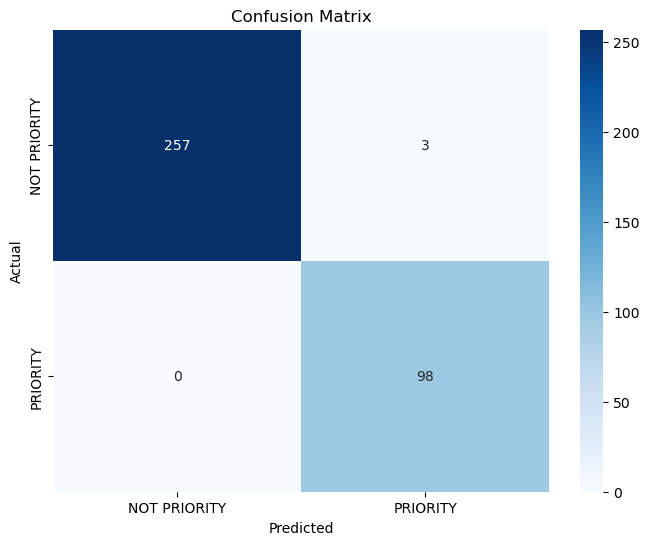

In [ ]:
print(f"The accuracy is: {accuracy}")
print(clf_report)


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
with open('predict_social_assistance_among_youth_svm_model.pkl', 'wb') as file:
 pickle.dump(svm_model, file)

In [ ]:
with open('predict_social_assistance_among_youth_svm_model.pkl', 'rb') as file:
 loaded_knn = pickle.load(file)

In [ ]:
dataset.head()

,no.,name,philhealth_status,ip,gender,age,civil_status,number_of_children,highest_education_attainment,osy_isy,out,youth_with_specific_needs,disability,work_status,priority_level
0,1,"BETE, RHEA M.",DEPENDENT,NO,FEMALE,20,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
1,2,"DARUNDAY, CARL KEVEEN G.",DEPENDENT,NO,MALE,21,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
2,3,"ABID, DOGENIO JR. A.",DEPENDENT,NO,MALE,22,SINGLE,0,VOCATIONAL,IN,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY
3,4,"DARAY, JOHN LOU N.",DEPENDENT,NO,MALE,20,SINGLE,0,COLLEGE LEVEL,IN,NONE,NO,NONE,EMPLOYED,NOT PRIORITY
4,5,"ABID, EUGENE A.",DEPENDENT,NO,MALE,26,SINGLE,0,COLLEGE GRADUATE,NONE,NONE,NO,NONE,UNEMPLOYED,NOT PRIORITY


In [ ]:
new_instances = X_test

In [ ]:
scale_new_data = scaler.transform(new_instances)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_youth_with_priority_assistance = loaded_knn.predict(new_instances)

print(predicted_youth_with_priority_assistance)

['NOT PRIORITY' 'PRIORITY' 'NOT PRIORITY' 'PRIORITY' 'PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'PRIORITY' 'PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'PRIORITY' 'PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'PRIORITY'
 'PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'PRIORITY' 'NOT PRIORITY'
 'PRIORITY' 'NOT PRIORITY' 'PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'PRIORITY' 'NOT PRIORITY'
 'NOT PRIORITY' 'NOT PRIORITY' 'NOT PRIORITY' 'PR

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

sample_data = dataset.drop(columns=['priority_level', 'name', 'no.']).head(10)

sample_data['philhealth_status'] = LabelEncoder().fit_transform(sample_data['philhealth_status'])
sample_data['ip'] = LabelEncoder().fit_transform(sample_data['ip'])
sample_data['gender'] = LabelEncoder().fit_transform(sample_data['gender'])
sample_data['civil_status'] = LabelEncoder().fit_transform(sample_data['civil_status'])
sample_data['highest_education_attainment'] = LabelEncoder().fit_transform(sample_data['highest_education_attainment'])
sample_data['osy_isy'] = LabelEncoder().fit_transform(sample_data['osy_isy'])
sample_data['out'] = LabelEncoder().fit_transform(sample_data['out'])
sample_data['youth_with_specific_needs'] = LabelEncoder().fit_transform(sample_data['youth_with_specific_needs'])
sample_data['disability'] = LabelEncoder().fit_transform(sample_data['disability'])
sample_data['work_status'] = LabelEncoder().fit_transform(sample_data['work_status'])

instance = scaler.transform(sample_data)

sample_predicted_youth_with_priority_assistance = loaded_knn.predict(instance)

sample_predicted_youth_with_priority_assistance


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array(['NOT PRIORITY', 'PRIORITY', 'PRIORITY', 'NOT PRIORITY', 'PRIORITY',
       'PRIORITY', 'PRIORITY', 'PRIORITY', 'PRIORITY', 'PRIORITY'],
      dtype=object)